In [1]:
from pdf2image import convert_from_path
from PIL import ImageDraw, ImageFont

In [2]:
file = 'hesc103.pdf'
sample_file = 'first_chapter.pdf'
start_page = 3
end_page = 3

In [3]:
sample_pil_image = convert_from_path(sample_file, first_page=3, last_page=3)[0]
pil_images = convert_from_path(file, first_page=start_page, last_page=end_page)

In [24]:
def draw_grid(img, grid_size):
    image = img.copy()
    draw = ImageDraw.Draw(image)

    # Get image dimensions
    width, height = image.size

    # Draw vertical grid lines
    for x in range(0, width, grid_size):
        draw.line([(x, 0), (x, height)], fill='black', width=1)
        draw.text((x, 0), f'({x},0)', fill='black', font=ImageFont.truetype(font='arial.ttf',size=20))

    # Draw horizontal grid lines
    for y in range(0, height, grid_size):
        draw.line([(0, y), (width, y)], fill='black', width=1)
        draw.text((0, y), f'(0,{y})', fill='black', font=ImageFont.truetype(font='arial.ttf',size=20))

    return image


In [46]:
res = draw_grid(pil_images[0], 100)

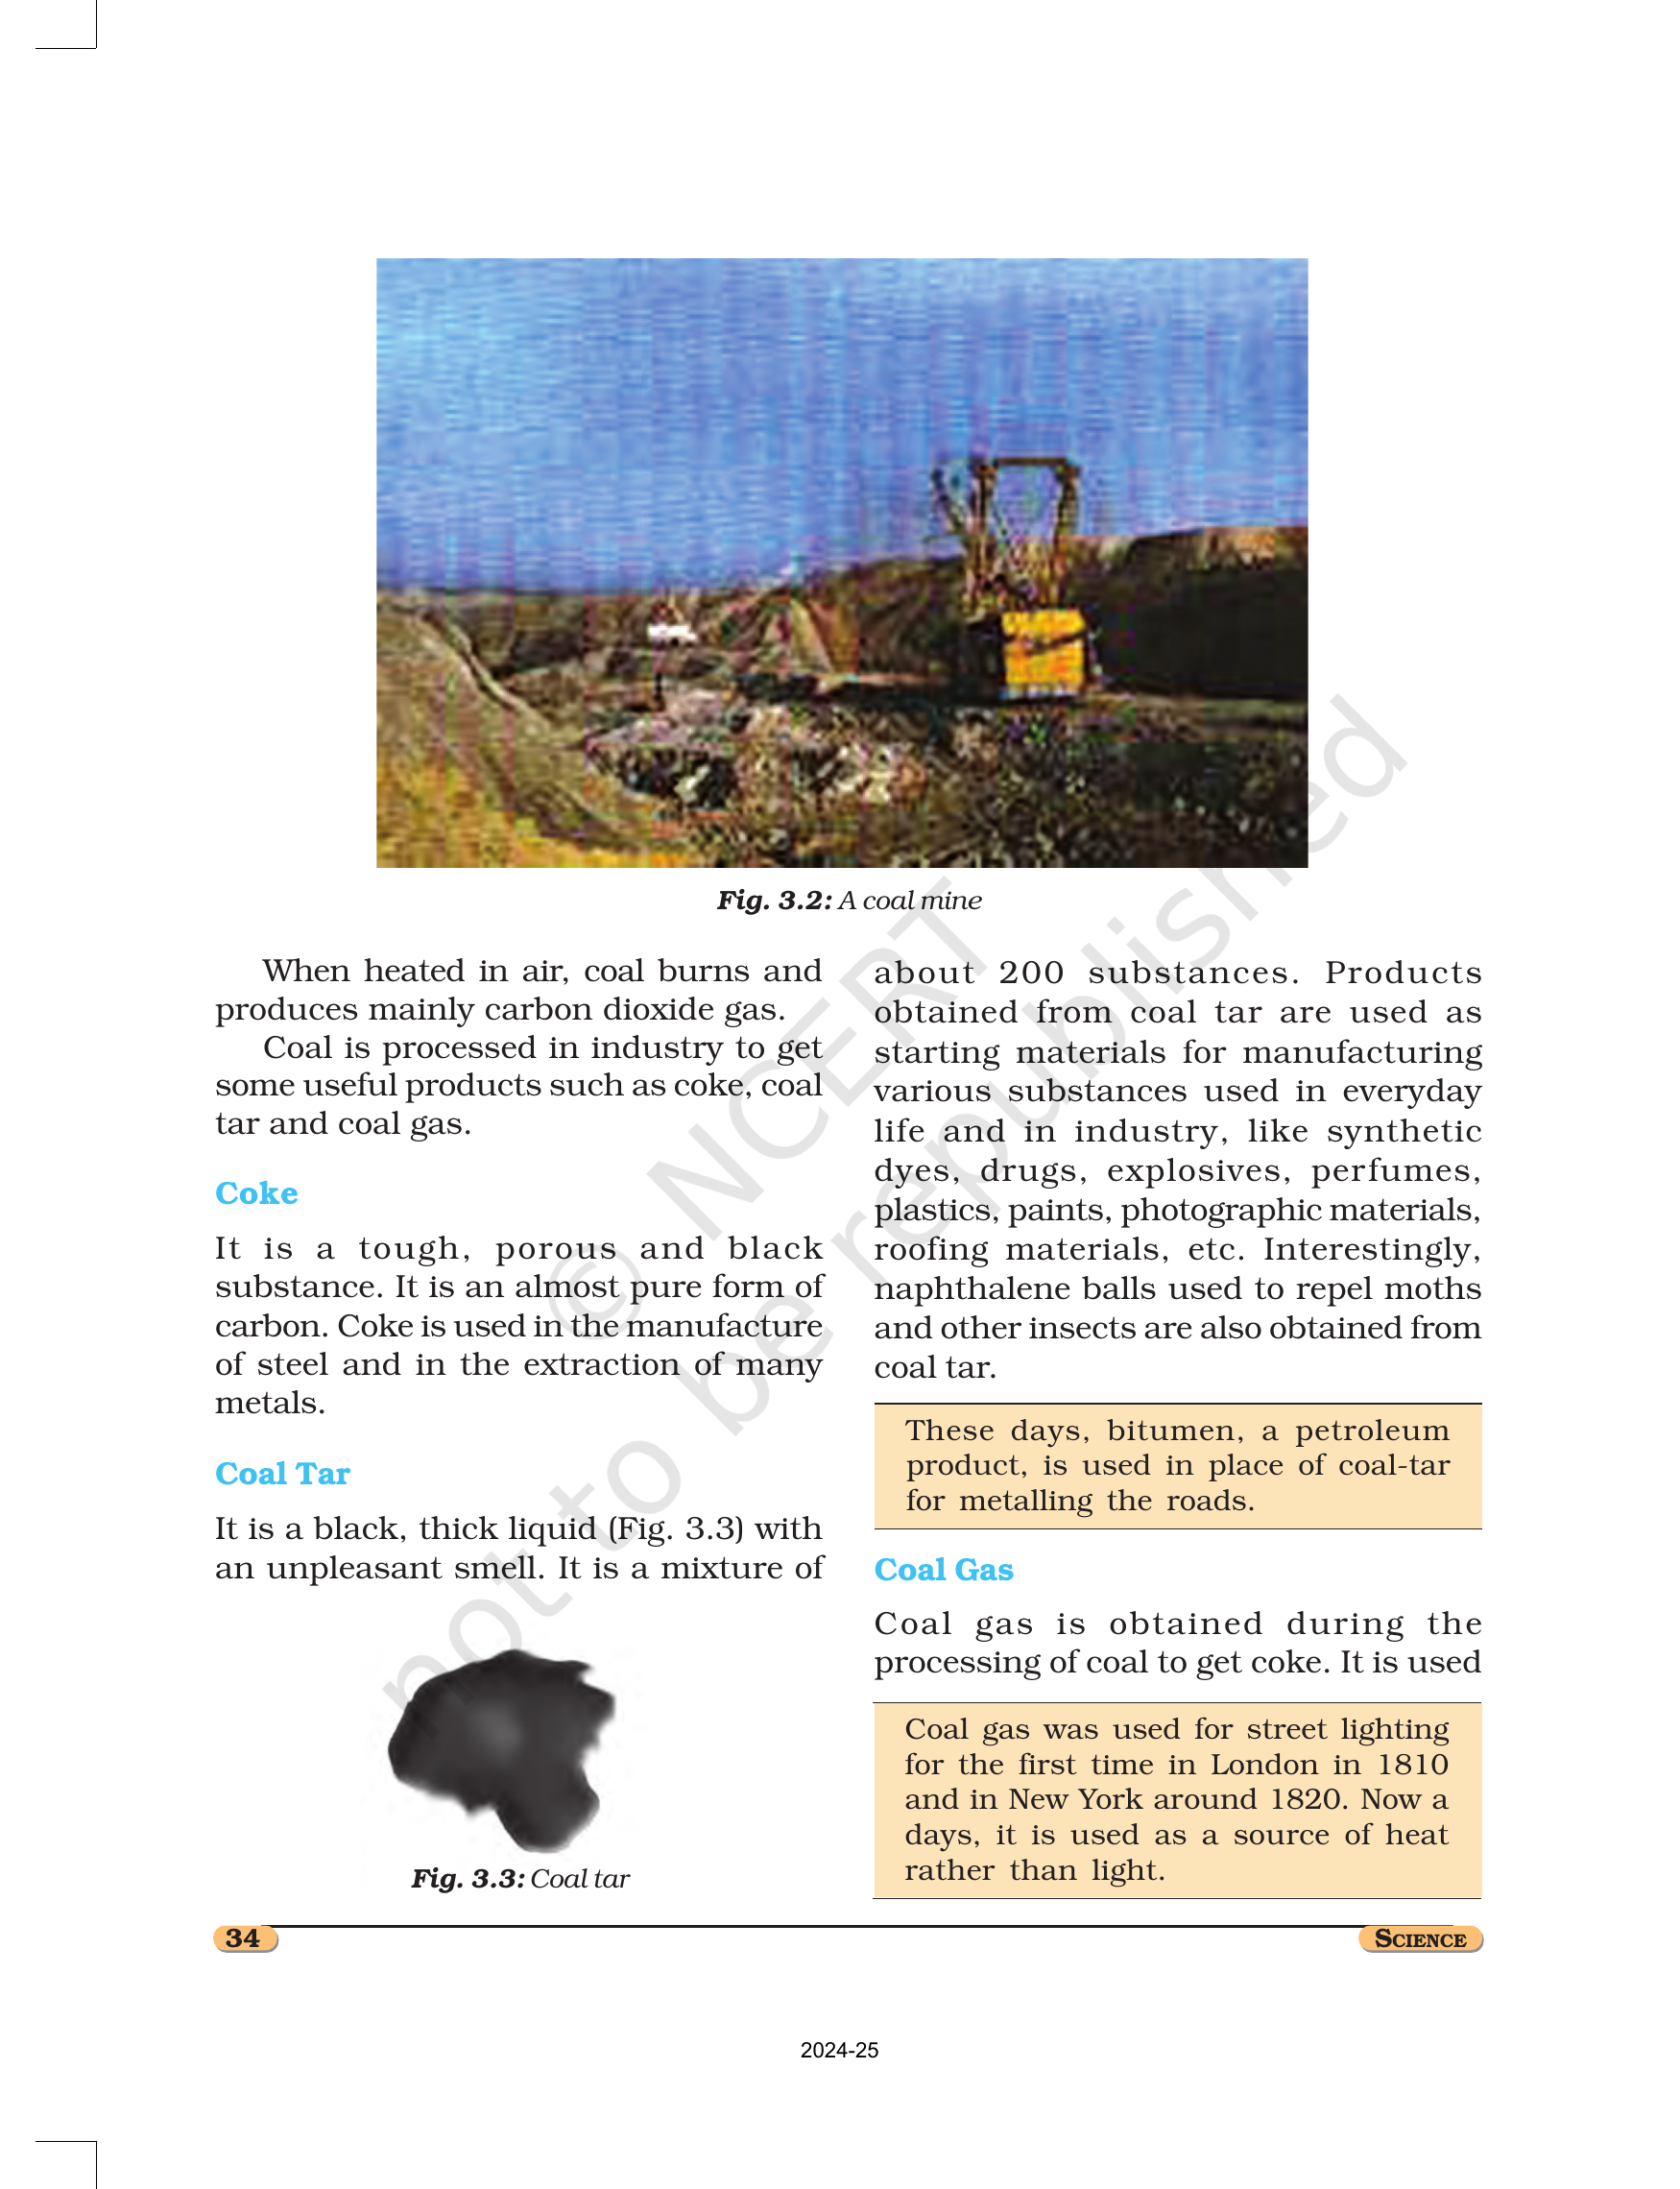

In [44]:
display(pil_images[0])

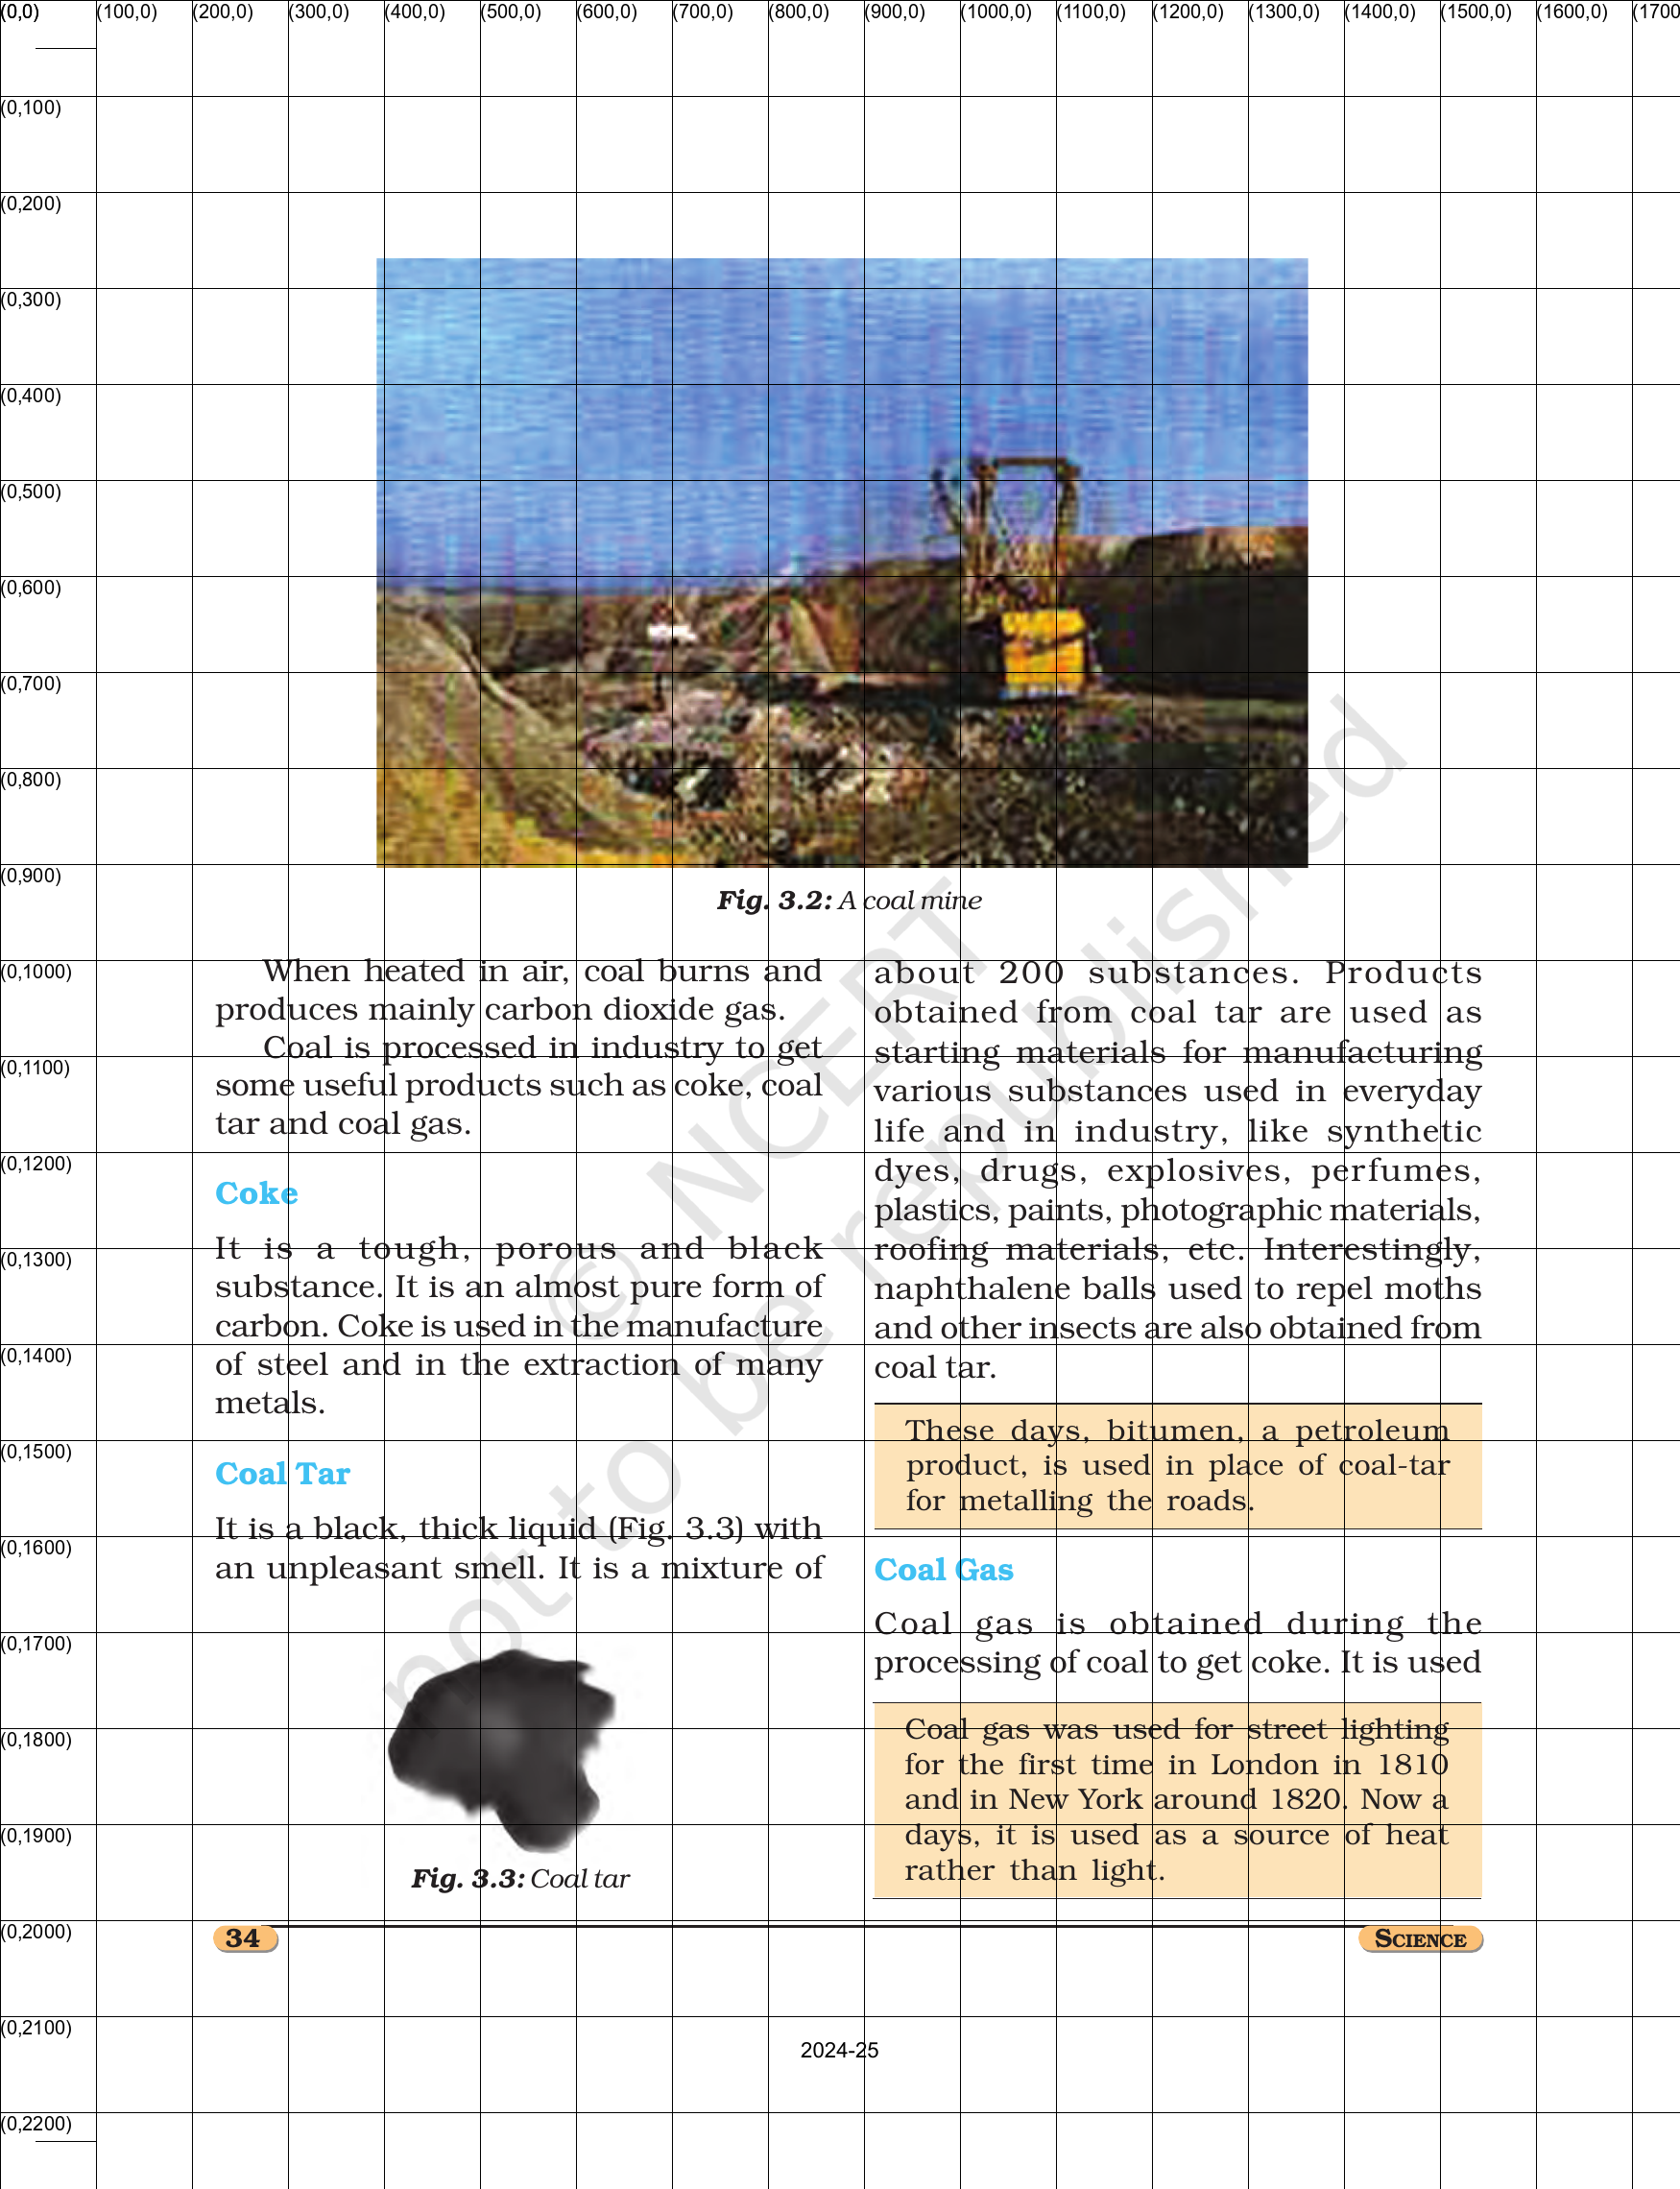

In [47]:
display(res)

In [28]:
from dotenv import get_key
import google.generativeai as genai

In [29]:
api_key = get_key('.env', 'GEMINI_API_KEY')
genai.configure(api_key=api_key)

In [62]:
# gen_config = genai.GenerationConfig(
#     temperature=0.5,
#     top_k=50,
#     top_p=0.8
# )

model = genai.GenerativeModel(
    model_name='gemini-pro-vision',
    # generation_config=gen_config
)
response = model.generate_content([
    """Given two images of a PDF page, identify if there any images in the page. If there are images, identify x1,y1,x2,y2 of the image using the coordinates in the gridlines. Include the figure caption as part of the image.
    x1 is the vertical line that marks the left of the image
    x2 is the vertical line that marks the right of the image
    y1 is the horizontal line that marks the top of the image
    y2 is the horizontal line that marks the bottom of the image

    You must cover the entire image. Also include the image caption inside the coordinates

    Output format: (x1,y1,x2,y2)


    
    """,
    pil_images[0],
    res
])

In [63]:
print(response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": " Page 1:\n- (580, 25, 950, 180): Fig 3.2 A coal mine\n- (580, 190, 950, 340): When heated in air, coal burns and produces mainly carbon dioxide gas. Coal is processed in industry to get some useful products such as coke, coal tar and coal gas.\n\n- (580, 360, 950, 510): Coke\n- (580, 520, 950, 680): It is a tough, porous and black substance. It is an almost pure form of carbon. Coke is used in the manufacture of steel and in the extraction of many metals.\n\n- (580, 700, 950, 850): Coal Tar\n- (580, 860, 950, 1010): It is a black, thick liquid (Fig. 3.3) with an unpleasant smell. It is a mixture of unpleasant smell. It is a mixture of coal gas is obtained during the processing of coal to get coke. It is used for street lighting for the first time in London i

In [64]:
print(response.text)

 Page 1:
- (580, 25, 950, 180): Fig 3.2 A coal mine
- (580, 190, 950, 340): When heated in air, coal burns and produces mainly carbon dioxide gas. Coal is processed in industry to get some useful products such as coke, coal tar and coal gas.

- (580, 360, 950, 510): Coke
- (580, 520, 950, 680): It is a tough, porous and black substance. It is an almost pure form of carbon. Coke is used in the manufacture of steel and in the extraction of many metals.

- (580, 700, 950, 850): Coal Tar
- (580, 860, 950, 1010): It is a black, thick liquid (Fig. 3.3) with an unpleasant smell. It is a mixture of unpleasant smell. It is a mixture of coal gas is obtained during the processing of coal to get coke. It is used for street lighting for the first time in London in 1810 and in New York around 1820. Now a days, it is used as a source of heat rather than light.

Page 2:
- (0, 700, 380, 850): Fig 3.3 Coal tar


In [18]:
def extract_region(image, coordinates):

    # Extract the region defined by the coordinates
    cropped_image = image.crop(coordinates)

    # Save or display the cropped image
    # cropped_image.show()  # Display the cropped image
    display(cropped_image)
    # cropped_image.save('path/to/save/cropped_image.jpg')  # Save the cropped image to a file


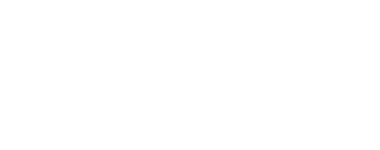

In [65]:
extract_region(pil_images[0], (0, 700, 380, 850))

In [34]:
pil_images[0].save('img2.png')
res.save('img3.png')

In [36]:
from openai import OpenAI
import base64
 
client = OpenAI()

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

example_images = []

for i in range(2, 4):
  example_images.append(encode_image(f'img{i}.png'))


In [38]:
response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": """
Given two images of a PDF page, identify if there any images in the page. If there are images, identify x1,y1,x2,y2 of the image using the coordinates in the gridlines. Include the figure caption as part of the image. 
    x1 is the vertical line that marks the left of the image
    x2 is the vertical line that marks the right of the image
    y1 is the horizontal line that marks the top of the image
    y2 is the horizontal line that marks the bottom of the image

    Output format: (x1,y1,x2,y2)
"""},
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{example_images[0]}",
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{example_images[1]}",
          },
        },
      ],
    }
  ],
)

In [39]:
response

ChatCompletion(id='chatcmpl-9WfLsGB83ZBfmBiyAV4SpItmcR5jm', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='There are two images on the PDF page.\n\n1. The first image (Fig. 3.2: A coal mine):\n   - x1 = 300\n   - y1 = 300\n   - x2 = 1400\n   - y2 = 900\n\n2. The second image (Fig. 3.3: Coal tar):\n   - x1 = 100\n   - y1 = 1700\n   - x2 = 600\n   - y2 = 1900\n\nOutput format: \n- (300, 300, 1400, 900)\n- (100, 1700, 600, 1900)', role='assistant', function_call=None, tool_calls=None))], created=1717572480, model='gpt-4o-2024-05-13', object='chat.completion', system_fingerprint='fp_aa87380ac5', usage=CompletionUsage(completion_tokens=142, prompt_tokens=1665, total_tokens=1807))

In [40]:
print(response.choices[0].message.content)

There are two images on the PDF page.

1. The first image (Fig. 3.2: A coal mine):
   - x1 = 300
   - y1 = 300
   - x2 = 1400
   - y2 = 900

2. The second image (Fig. 3.3: Coal tar):
   - x1 = 100
   - y1 = 1700
   - x2 = 600
   - y2 = 1900

Output format: 
- (300, 300, 1400, 900)
- (100, 1700, 600, 1900)


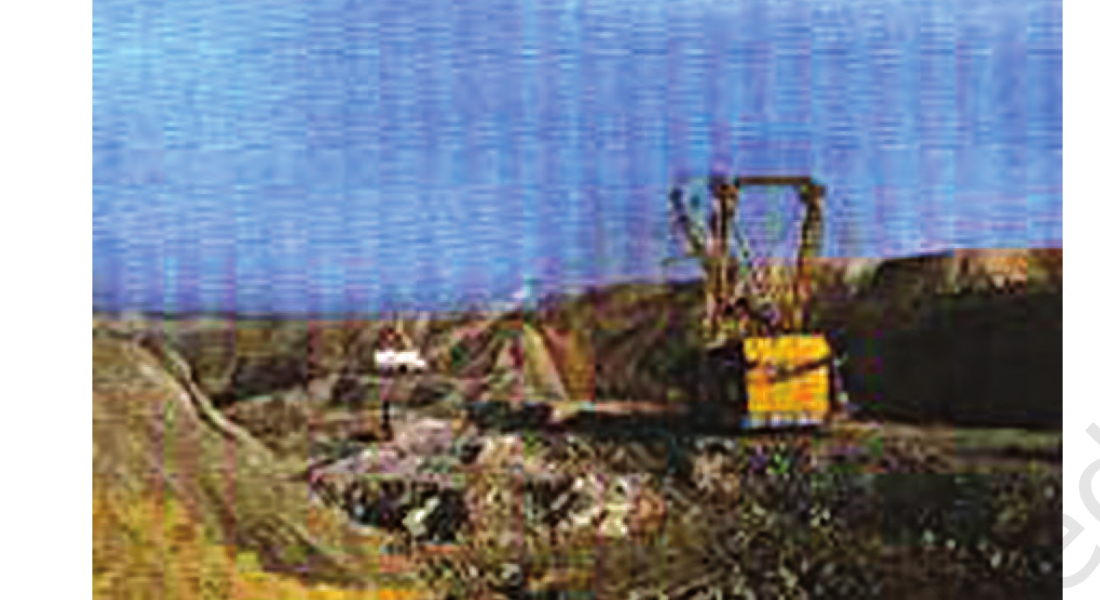

In [41]:
extract_region(pil_images[0], (300, 300, 1400, 900))

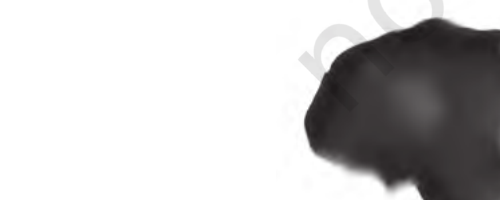

In [42]:
extract_region(pil_images[0], (100, 1700, 600, 1900))